In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#Load Libraries
import pandas 
import numpy 
import matplotlib.pyplot as plt

#Neural Network

### Data Preparation

In [3]:
x_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_train.csv')
y_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_train.csv')
features = ['whc', 'silt', 'silt', 'clay',	'om',	'kwfactor',	'kffactor',	'spH',
            'tfactor',	'Yearly Precipitation',	'Yearly Average Temperature','Value of Previous Year']
target = ['Value']

In [4]:
x_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_test.csv')
y_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_test.csv')

In [5]:
print(x_train.shape) 
print(y_train.shape)

(69809, 32)
(69809, 2)


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69809 entries, 0 to 69808
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  69809 non-null  int64  
 1   whc                         69809 non-null  float64
 2   sand                        69809 non-null  float64
 3   silt                        69809 non-null  float64
 4   clay                        69809 non-null  float64
 5   om                          69809 non-null  float64
 6   kwfactor                    69809 non-null  float64
 7   kffactor                    69809 non-null  float64
 8   spH                         69809 non-null  float64
 9   tfactor                     69809 non-null  float64
 10  Yearly Precipitation        69809 non-null  float64
 11  Yearly Average Temperature  69809 non-null  float64
 12  Value of Previous Year      69809 non-null  float64
 13  Crossed Soil Composition    698

In [7]:
x_train= x_train.drop(columns=['Unnamed: 0'])

In [8]:
x_test= x_test.drop(columns=['Unnamed: 0'])

In [9]:
y_train= y_train.iloc[:,1:2]
y_train.head()
print(y_train.shape)

y_test= y_test.iloc[:,1:2]
#y_test.head()

(69809, 1)


In [10]:
print(f'We have {x_train.shape[0]} train samples')
print(f'We have {x_test.shape[0]} test samples')

We have 69809 train samples
We have 17453 test samples


In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(69809, 31)
(17453, 31)
(69809, 1)
(17453, 1)


In [12]:
y_train.head()

,Value
0,25.7
1,3.0
2,29.0
3,34.4
4,51.3


In [13]:
y_test.head()

,Value
0,32.5
1,39.0
2,50.0
3,52.8
4,20.3


### Model Trials 

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

In [ ]:
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# build the NN model

input_dim = x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(1024, activation=tf.nn.relu, 
                input_dim = input_dim)) 
lr_model.add(Dropout(0.1))
lr_model.add(Dense(512, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(1, activation=tf.nn.relu))

# compile the model
lr_model.compile(loss='mse',
              optimizer=sgd, #rms
              metrics=['acc'])

In [ ]:
# Fit the model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60
2264/2264 [==============================] - 5s 2ms/step - loss: 1155.0435 - acc: 6.6269e-04 - val_loss: 1161.2692 - val_acc: 2.7612e-04
Epoch 2/60
2264/2264 [==============================] - 4s 2ms/step - loss: 1147.7667 - acc: 6.6269e-04 - val_loss: 1161.2692 - val_acc: 2.7612e-04
Epoch 3/60
2264/2264 [==============================] - 4s 2ms/step - loss: 1147.7656 - acc: 6.6269e-04 - val_loss: 1161.2692 - val_acc: 2.7612e-04
Epoch 4/60
2264/2264 [==============================] - 4s 2ms/step - loss: 1147.7646 - acc: 6.6269e-04 - val_loss: 1161.2692 - val_acc: 2.7612e-04
Epoch 5/60
2264/2264 [==============================] - 4s 2ms/step - loss: 1147.7656 - acc: 6.6269e-04 - val_loss: 1161.2692 - val_acc: 2.7612e-04
Epoch 6/60
2264/2264 [==============================] - 4s 2ms/step - loss: 1147.7664 - acc: 6.6269e-04 - val_loss: 1161.2692 - val_acc: 2.7612e-04
Epoch 7/60
2264/2264 [==============================] - 4s 2ms/step - loss: 1147.7659 - acc: 6.6269e-04 - val_lo

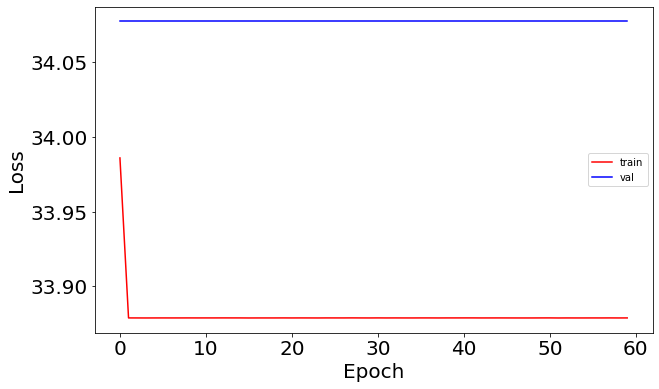

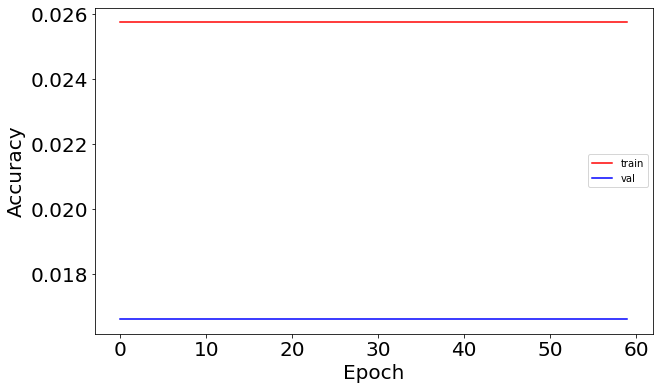

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
# hyperparam
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=31)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [ ]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys


Epoch 1/10
566/566 [==============================] - 2s 2ms/step - loss: 109001.2031 - accuracy: 6.6269e-04
Epoch 2/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.2422 - accuracy: 5.6605e-04
Epoch 3/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.1172 - accuracy: 6.6269e-04
Epoch 4/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.2422 - accuracy: 6.3508e-04
Epoch 5/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.1875 - accuracy: 6.6269e-04
Epoch 6/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.2031 - accuracy: 6.6269e-04
Epoch 7/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.1484 - accuracy: 6.6269e-04
Epoch 8/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.2031 - accuracy: 6.6269e-04
Epoch 9/10
566/566 [==============================] - 1s 2ms/step - loss: 109001.2266 - accuracy: 6.6269e-04
Epoch 10/10
566/566

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.0006626905330146352 using {'init_mode': 'zero'}
 mean=0.0003037, std=0.0003142 using {'init_mode': 'uniform'}
 mean=4.142e-05, std=0.0 using {'init_mode': 'lecun_uniform'}
 mean=9.664e-05, std=3.905e-05 using {'init_mode': 'normal'}
 mean=0.0006627, std=5.857e-05 using {'init_mode': 'zero'}
 mean=2.761e-05, std=3.905e-05 using {'init_mode': 'glorot_normal'}
 mean=5.522e-05, std=5.166e-05 using {'init_mode': 'glorot_uniform'}
 mean=9.664e-05, std=3.905e-05 using {'init_mode': 'he_normal'}
 mean=8.284e-05, std=5.857e-05 using {'init_mode': 'he_uniform'}


In [ ]:
# repeat some of the initial values here so we make sure they were not changed
input_dim = x_train.shape[1]

# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model_2(optimizer='rmsprop', init='zero'):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init, activation=tf.nn.relu))
    model.add(Dense(1, kernel_initializer=init, activation=tf.nn.relu))

    # compile model
    model.compile(loss='mse', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [ ]:
%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
numpy.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['glorot_uniform', 'uniform'] 
batches = [128, 512]
epochs = [10, 20]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys


Epoch 1/10
378/378 [==============================] - 1s 2ms/step - loss: 119112.6172 - accuracy: 6.2127e-04
Epoch 2/10
378/378 [==============================] - 1s 2ms/step - loss: 108335.8594 - accuracy: 6.2127e-04
Epoch 3/10
378/378 [==============================] - 1s 2ms/step - loss: 108335.8516 - accuracy: 6.2127e-04
Epoch 4/10
378/378 [==============================] - 1s 2ms/step - loss: 108335.8281 - accuracy: 6.2127e-04
Epoch 5/10
378/378 [==============================] - 1s 2ms/step - loss: 108335.8750 - accuracy: 6.2127e-04
Epoch 6/10
378/378 [==============================] - 1s 2ms/step - loss: 108335.8750 - accuracy: 6.2127e-04
Epoch 7/10
378/378 [==============================] - 1s 2ms/step - loss: 108339.9766 - accuracy: 6.2127e-04
Epoch 8/10
378/378 [==============================] - 1s 2ms/step - loss: 109154.1719 - accuracy: 6.2127e-04
Epoch 9/10
378/378 [==============================] - 1s 2ms/step - loss: 108338.0391 - accuracy: 6.2127e-04
Epoch 10/10
189/189

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.0006627 using {'batch_size': 128, 'epochs': 10, 'init': 'glorot_uniform'}
mean=0.0006627, std=5.857e-05 using {'batch_size': 128, 'epochs': 10, 'init': 'glorot_uniform'}
mean=4.142e-05, std=5.857e-05 using {'batch_size': 128, 'epochs': 10, 'init': 'uniform'}
mean=0.0004142, std=0.0002929 using {'batch_size': 128, 'epochs': 20, 'init': 'glorot_uniform'}
mean=4.142e-05, std=5.857e-05 using {'batch_size': 128, 'epochs': 20, 'init': 'uniform'}
mean=0.0006627, std=5.857e-05 using {'batch_size': 512, 'epochs': 10, 'init': 'glorot_uniform'}
mean=4.142e-05, std=5.857e-05 using {'batch_size': 512, 'epochs': 10, 'init': 'uniform'}
mean=0.0006627, std=5.857e-05 using {'batch_size': 512, 'epochs': 20, 'init': 'glorot_uniform'}
mean=4.142e-05, std=5.857e-05 using {'batch_size': 512, 'epochs': 20, 'init': 'uniform'}


https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594


### Final Models Used for Evaluation

#### Model 1 Basic FNN

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(31,)),
    Dense(32, activation='relu'),
    Dense(1, activation='relu'),
])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mean_squared_error'])

batch_size=1000
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 [==============================] - 1s 7ms/step - loss: 1314.9686 - mean_squared_error: 1314.9686 - val_loss: 1153.5778 - val_mean_squared_error: 1153.5778
Epoch 2/10
70/70 [==============================] - 0s 4ms/step - loss: 1157.7495 - mean_squared_error: 1157.7495 - val_loss: 1153.5778 - val_mean_squared_error: 1153.5778
Epoch 3/10
70/70 [==============================] - 0s 4ms/step - loss: 1157.7499 - mean_squared_error: 1157.7499 - val_loss: 1153.5778 - val_mean_squared_error: 1153.5778
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 1157.7498 - mean_squared_error: 1157.7498 - val_loss: 1153.5778 - val_mean_squared_error: 1153.5778
Epoch 5/10
70/70 [==============================] - 0s 4ms/step - loss: 1157.7498 - mean_squared_error: 1157.7498 - val_loss: 1153.5778 - val_mean_squared_error: 1153.5778
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 1157.7498 - mean_squared_error: 1157.7498 - val_loss: 1153.5778 - va

Epoch 1/100
1746/1746 [==============================] - 3s 2ms/step - loss: 1153.3124 - mean_squared_error: 1153.3124 - val_loss: 1175.4966 - val_mean_squared_error: 1175.4966
Epoch 2/100
1746/1746 [==============================] - 3s 2ms/step - loss: 1153.3141 - mean_squared_error: 1153.3141 - val_loss: 1175.4966 - val_mean_squared_error: 1175.4966
Epoch 3/100
1746/1746 [==============================] - 3s 2ms/step - loss: 1153.3123 - mean_squared_error: 1153.3123 - val_loss: 1175.4966 - val_mean_squared_error: 1175.4966
Epoch 4/100
1746/1746 [==============================] - 3s 2ms/step - loss: 1153.3154 - mean_squared_error: 1153.3154 - val_loss: 1175.4966 - val_mean_squared_error: 1175.4966
Epoch 5/100
1746/1746 [==============================] - 3s 2ms/step - loss: 1153.3135 - mean_squared_error: 1153.3135 - val_loss: 1175.4966 - val_mean_squared_error: 1175.4966
Epoch 6/100
1746/1746 [==============================] - 3s 2ms/step - loss: 1153.3131 - mean_squared_error: 1153.3

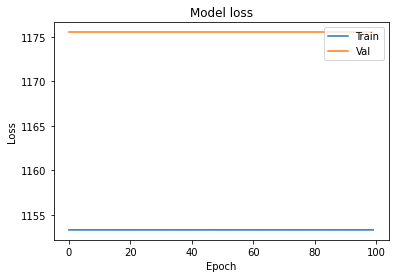

In [16]:
import matplotlib.pyplot as plt

hist = model.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_split=0.2)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
y_pred= model.predict(x_test)

import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

# print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 11.129848941957185
MSE: 195.46331260582696
RMSE: 13.980819454017242
R-Squared: 0.17762095590540172


In [ ]:
print(y_pred)

[[40.014763]
 [25.234587]
 [40.014763]
 ...
 [25.234587]
 [25.234587]
 [40.014763]]


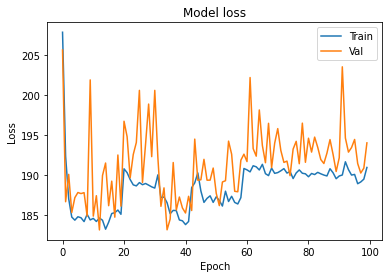

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
# plt.ylim(top=1.2, bottom=0)
plt.show()

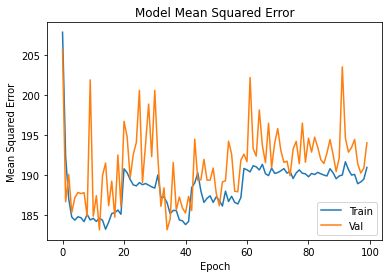

In [ ]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### Model 1 with Dropout and L2 Penalty

In [ ]:
from keras.layers import Dropout
from keras import regularizers

model_2 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(30,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    # Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Dropout(0.3),
    # Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Dropout(0.3),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
sgd = SGD(lr=0.001, momentum=0.9)
model_2.compile(loss='mse', optimizer=sgd, metrics=['mean_squared_error'])

model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                992       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_52 (Dense)            (None, 32)                1056      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# fit model
# history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# model_2.compile(optimizer='sgd',
#               loss='mse', 
#               metrics=['mean_squared_error']
#               )
              
hist_2 = model_2.fit(x_train, y_train,
          batch_size=32, 
          epochs=100,
          #epochs=100,
          #validation_split=0.2
          validation_data=(x_test, y_test)
          )

Epoch 1/100
2264/2264 [==============================] - 5s 2ms/step - loss: 231.6981 - mean_squared_error: 229.2949 - val_loss: 213.2279 - val_mean_squared_error: 210.7107
Epoch 2/100
2264/2264 [==============================] - 4s 2ms/step - loss: 217.3164 - mean_squared_error: 215.0137 - val_loss: 206.5898 - val_mean_squared_error: 204.4113
Epoch 3/100
2264/2264 [==============================] - 4s 2ms/step - loss: 212.9654 - mean_squared_error: 210.5949 - val_loss: 205.9296 - val_mean_squared_error: 203.4560
Epoch 4/100
2264/2264 [==============================] - 4s 2ms/step - loss: 213.9418 - mean_squared_error: 211.4998 - val_loss: 207.5820 - val_mean_squared_error: 205.2026
Epoch 5/100
2264/2264 [==============================] - 4s 2ms/step - loss: 213.2514 - mean_squared_error: 210.9854 - val_loss: 206.3709 - val_mean_squared_error: 204.2333
Epoch 6/100
2264/2264 [==============================] - 4s 2ms/step - loss: 213.2771 - mean_squared_error: 211.2276 - val_loss: 212.91

In [ ]:
y_pred_2= model_2.predict(x_test)

import sklearn.metrics as metrics

mae_2 = metrics.mean_absolute_error(y_test, y_pred_2)
mse_2 = metrics.mean_squared_error(y_test, y_pred_2)
rmse_2 = numpy.sqrt(mse_2) # or mse**(0.5)  
r2_2 = metrics.r2_score(y_test, y_pred_2)

# print("Results of sklearn.metrics:")
print("MAE:",mae_2)
print("MSE:", mse_2)
print("RMSE:", rmse_2)
print("R-Squared:", r2_2)

MAE: 11.180737241214544
MSE: 205.40438448071274
RMSE: 14.331935824609065
R-Squared: 0.13579556638982182


In [ ]:
hist_2.history.keys()
# hist_2.history

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

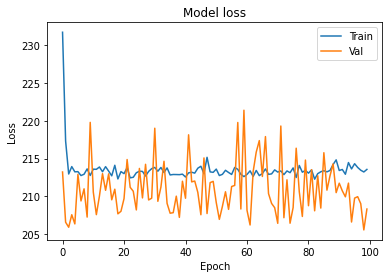

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
# plt.ylim(top=1.2, bottom=0)
plt.show()

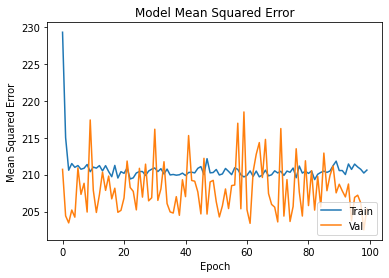

In [ ]:
plt.plot(hist_2.history['mean_squared_error'])
plt.plot(hist_2.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### Hyperparameter Tuning 

##### Tuning Number of Neurons

In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(neurons=32):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=30, kernel_initializer='uniform', activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
	# Compile model
	model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
	return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=1)

# define the grid search parameters
neurons = [10, 32, 64, 128]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# hyperparam
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # define model
    model = Sequential()
    model.add(Dense(64, activation=tf.nn.relu, input_dim=(32,)) 
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dense(1, activation=tf.nn.relu))
    # compile model
    model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

##### Tuning Batch Size and Number of Epochs

In [ ]:
%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
numpy.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
# init_mode = ['glorot_uniform', 'uniform'] 
batches = [10, 100, 150, 200, 250]
epochs = [32, 64, 128]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train, y_train)

#### Constructing the Optimal NN

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mean_squared_error'])

batch_size=300
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=32, validation_data=(x_test, y_test))

Epoch 1/32
242/242 [==============================] - 1s 3ms/step - loss: 395.3514 - mean_squared_error: 395.3514 - val_loss: 238.0644 - val_mean_squared_error: 238.0644
Epoch 2/32
242/242 [==============================] - 1s 3ms/step - loss: 230.5641 - mean_squared_error: 230.5641 - val_loss: 220.4538 - val_mean_squared_error: 220.4538
Epoch 3/32
242/242 [==============================] - 1s 2ms/step - loss: 206.7682 - mean_squared_error: 206.7682 - val_loss: 206.6091 - val_mean_squared_error: 206.6091
Epoch 4/32
242/242 [==============================] - 1s 2ms/step - loss: 192.9662 - mean_squared_error: 192.9662 - val_loss: 191.0873 - val_mean_squared_error: 191.0873
Epoch 5/32
242/242 [==============================] - 1s 3ms/step - loss: 184.2721 - mean_squared_error: 184.2721 - val_loss: 193.7460 - val_mean_squared_error: 193.7460
Epoch 6/32
242/242 [==============================] - 1s 2ms/step - loss: 179.3744 - mean_squared_error: 179.3744 - val_loss: 177.1940 - val_mean_squa

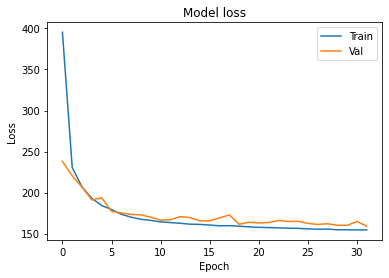

In [ ]:
import matplotlib.pyplot as plt

# hist = model.fit(x_train, y_train,
#           batch_size=32, epochs=300,
#           validation_split=0.2)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
y_pred= model.predict(x_test)

import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

# print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 10.048811785042984
MSE: 159.0876086775517
RMSE: 12.612993644553688
R-Squared: 0.330665617975205


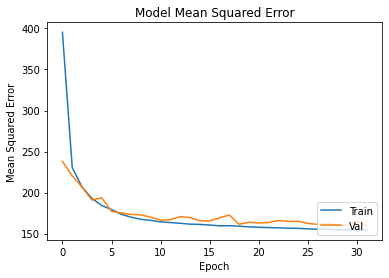

In [ ]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
print(y_pred)

[[34.194542]
 [28.866322]
 [35.126343]
 ...
 [28.086575]
 [28.880499]
 [42.31659 ]]


#### Model using Selected Features Only (and optimal hyperparameters)

In [18]:
x_train_selected = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_train.csv')
y_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_train.csv')

In [21]:
x_train_selected.head()

,Unnamed: 0,whc,sand,silt,clay,om,kwfactor,kffactor,spH,tfactor,Yearly Precipitation,Yearly Average Temperature,Value of Previous Year,Crossed Soil Composition,Crossed Weather,CountryBit_0,CountryBit_1,CountryBit_2,CountryBit_3,CountryBit_4,CountryBit_5,CountryBit_6,CountyBit_0,CountyBit_1,CountyBit_2,CountyBit_3,CountyBit_4,CountyBit_5,CountyBit_6,CountyBit_7,CountyBit_8,CountyBit_9
0,68023,0.210550,0.245698,0.382833,0.371470,0.265889,0.287396,0.296346,0.559836,-0.460889,-0.378872,1.462751,-0.325183,0.034941,-0.554195,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1
1,3616,0.188625,0.482369,0.312032,0.205598,-0.454719,0.272022,0.279280,0.559474,-0.506774,-1.869119,-2.247051,-1.582330,0.030946,4.200007,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1
2,17103,0.231864,0.410889,0.370900,0.218210,-0.564958,0.333845,0.338063,0.540618,0.278003,-0.472953,0.435035,-1.125787,0.033255,-0.205751,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,72582,0.265604,0.299843,0.329149,0.371008,-0.602955,0.278977,0.281038,0.539735,0.141145,-0.226084,1.459170,-0.569996,0.036616,-0.329894,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,72125,0.245331,0.354606,0.416176,0.229218,1.688157,0.336346,0.338064,0.554209,0.410807,-0.923790,-2.173046,1.276025,0.033828,2.007439,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1


We keep Value of Previous Year, Yearly Precipitation, and Temperature Crossed

In [22]:
x_train_selected = x_train_selected[["Crossed Weather", "Value of Previous Year", "Yearly Precipitation"]]

In [23]:
x_train_selected.head()

,Crossed Weather,Value of Previous Year,Yearly Precipitation
0,-0.554195,-0.325183,-0.378872
1,4.200007,-1.582330,-1.869119
2,-0.205751,-1.125787,-0.472953
3,-0.329894,-0.569996,-0.226084
4,2.007439,1.276025,-0.923790


In [26]:
x_test_selected = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_test.csv')
y_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_test.csv')

In [27]:
x_test_selected = x_test_selected[["Crossed Weather", "Value of Previous Year", "Yearly Precipitation"]]

In [28]:
y_train= y_train.iloc[:, 1:2]
y_test= y_test.iloc[:, 1:2]

In [29]:
print(x_train_selected.shape)
print(x_test_selected.shape)
print(y_train.shape)
print(y_test.shape)

(69809, 3)
(17453, 3)
(69809, 1)
(17453, 1)


In [39]:
model_selected = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model_selected.compile(optimizer='sgd',
              loss='mse',
              metrics=['mean_squared_error'])

batch_size=300
hist_selected = model_selected.fit(x_train_selected, y_train, batch_size=batch_size, epochs=32, validation_data=(x_test_selected, y_test))

Epoch 1/32
233/233 [==============================] - 1s 3ms/step - loss: 145.8826 - mean_squared_error: 145.8826 - val_loss: 65.5937 - val_mean_squared_error: 65.5937
Epoch 2/32
233/233 [==============================] - 1s 2ms/step - loss: 70.2535 - mean_squared_error: 70.2535 - val_loss: 63.2985 - val_mean_squared_error: 63.2985
Epoch 3/32
233/233 [==============================] - 1s 2ms/step - loss: 68.0088 - mean_squared_error: 68.0088 - val_loss: 64.7047 - val_mean_squared_error: 64.7047
Epoch 4/32
233/233 [==============================] - 1s 3ms/step - loss: 66.1941 - mean_squared_error: 66.1941 - val_loss: 62.7801 - val_mean_squared_error: 62.7801
Epoch 5/32
233/233 [==============================] - 0s 2ms/step - loss: 65.2502 - mean_squared_error: 65.2502 - val_loss: 71.3315 - val_mean_squared_error: 71.3315
Epoch 6/32
233/233 [==============================] - 1s 2ms/step - loss: 64.4697 - mean_squared_error: 64.4697 - val_loss: 62.1741 - val_mean_squared_error: 62.1741
Ep

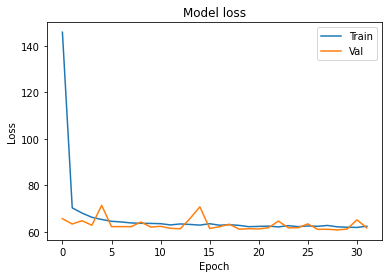

In [40]:
import matplotlib.pyplot as plt

# hist = model.fit(x_train, y_train,
#           batch_size=32, epochs=300,
#           validation_split=0.2)

plt.plot(hist_selected.history['loss'])
plt.plot(hist_selected.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [41]:
y_pred_selected= model_selected.predict(x_test_selected)

import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred_selected)
mse = metrics.mean_squared_error(y_test, y_pred_selected)
rmse = numpy.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred_selected)

# print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 5.820394409280011
MSE: 61.63738846199645
RMSE: 7.850948252408523
R-Squared: 0.7342241909081526


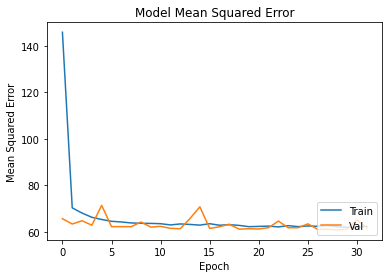

In [48]:
plt.plot(hist_selected.history['mean_squared_error'])
plt.plot(hist_selected.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()